In [301]:
from nasbench import api
import numpy as np

In [302]:
#nasbench = api.NASBench('/home/trofim/nasbench/nasbench_only108.tfrecord')
nasbench = api.NASBench('/home/trofim/nasbench_full.tfrecord')

Loading dataset from file... This may take a few minutes...
Loaded dataset in 264 seconds


In [290]:
import pickle
obj = pickle.load(open('/home/trofim/Pytorch-VAE/desriptors/dim4-WassersteinVAE_RBF-version_13-epoch-149.pkl', 'rb'))

In [304]:
y_all = []
y_lf = []

for hash_id, unique_hash in enumerate(nasbench.hash_iterator()):    
    fixed_metrics, computed_metrics = nasbench.get_metrics_from_hash(unique_hash)
    y = computed_metrics[108][2]['final_test_accuracy']
    size = len(computed_metrics[108])
    acc_test = [computed_metrics[108][x]['final_test_accuracy'] for x in range(size)]
    acc_val = [computed_metrics[108][x]['final_validation_accuracy'] for x in range(size)]
    
    #print(acc_test, acc_val)

    if y >= 0.7:
        y_all.append((np.mean(acc_test), np.mean(acc_val), y, acc_val, unique_hash))
        y_lf.append({36 : [], 12 : [], 4 : []})
        
        for it in [4, 12, 36]:
            size = len(computed_metrics[it])
            acc_test = [computed_metrics[it][x]['final_test_accuracy'] for x in range(size)]
            acc_val = [computed_metrics[it][x]['final_validation_accuracy'] for x in range(size)]
            
            y_lf[-1][it] = [np.mean(acc_test), np.mean(acc_val)]

In [305]:
train_size = int(len(y_all) * 0.9)

In [307]:
train_size

378144

In [310]:
test_size = len(y_all) - train_size

In [311]:
len(y_all)

420161

In [312]:
from matplotlib import pyplot as plt

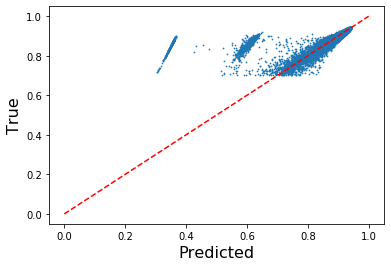

In [313]:
plt.scatter([x[0] for x in y_all], [x[2] for x in y_all], s = 0.5)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('True', fontsize=16)
plt.plot([0,1], [0,1], color = 'red', linestyle='--')

In [314]:
len(obj['ys'])

420161

In [315]:
#bad_desc_hash = sorted(y_all)[0][1]

In [317]:
bad_desc_i = sorted(list(enumerate(y_all)), key = lambda x : x[1][0])[0][0]
all_desc = obj['descriptors'][test_size:] + obj['descriptors'][:test_size]
y_all_permuted = y_all[train_size:] + y_all[:train_size]
y_lf_permuted =  y_lf[train_size:] + y_lf[:train_size]

bad_desc = all_desc[bad_desc_i]

In [318]:
len(all_desc)

420161

In [319]:
len(y_all)

420161

In [320]:
from copy import deepcopy

In [321]:
obj2 = deepcopy(obj)

In [322]:
obj2['ys_val'] = np.array([x[1] for x in y_all_permuted])     # val loss
obj2['y'] = np.array([x[2] for x in y_all_permuted])          # test loss, seed 2
obj2['ys_test'] = np.array([x[0] for x in y_all_permuted])    # test loss
obj2['ys_all_val'] = np.array([x[3] for x in y_all_permuted]) # list of valt losses
obj2['hash'] = [x[-1] for x in y_all_permuted]
obj2['y_lf'] = y_lf_permuted
#obj2['ys'] = obj2['ys_val']

In [323]:
obj2['path_to_model'] = obj['path_to_model'] + '_mod'

In [324]:
pickle.dump(obj2, open('/home/trofim/Pytorch-VAE/desriptors/dim4-WassersteinVAE_RBF-version_13-epoch-149.mod.pkl', 'wb'))

In [202]:
bad_desc

array([-0.8542692,  1.9537585, -0.9996753, -3.7189994], dtype=float32)

In [135]:
graph_desc = {}

for i, d in enumerate(all_desc):
    uniq_hash = y_all[i][-1]
    graph_desc[uniq_hash] = d

In [166]:
for hash_id, unique_hash in enumerate(nasbench.hash_iterator()):
    fixed_metrics, computed_metrics = nasbench.get_metrics_from_hash(unique_hash)
    y = computed_metrics[108][2]['final_test_accuracy']

    if y < 0.7:
        graph_desc[unique_hash] = bad_desc + np.random.normal(0, 0.1, 4)

In [167]:
len(graph_desc)

423624

In [168]:
pickle.dump(graph_desc, open('graph_desc.pickle', 'wb'))

In [161]:
import numpy as np

In [81]:
bananas_acc = {}

for r in range(100):
    bananas = pickle.load(open('/home/trofim/local_search/results_output/test_wae/round_%d.pkl' % r, 'rb'))
    
    for i, algo in enumerate(bananas[0]):
        bananas_acc.setdefault(algo['algo_name'], np.zeros(15))
        bananas_acc[algo['algo_name']] += bananas[2][i][:, 1]
        
for k in bananas_acc:
    bananas_acc[k] /= 100

In [82]:
bananas_acc

{'random': array([6.749176, 6.578685, 6.539891, 6.505456, 6.499166, 6.472524,
        6.440105, 6.399441, 6.378075, 6.35644 , 6.35362 , 6.347444,
        6.343805, 6.333723, 6.328481]),
 'evolution': array([6.754451, 6.588302, 6.506941, 6.477129, 6.431987, 6.39156 ,
        6.376637, 6.355604, 6.324555, 6.30499 , 6.288464, 6.271571,
        6.247231, 6.235077, 6.218247]),
 'local_search': array([6.753935, 6.45636 , 6.358873, 6.308794, 6.239515, 6.188548,
        6.143771, 6.125558, 6.105022, 6.083521, 6.066126, 6.051736,
        6.033975, 6.028417, 6.015028])}

In [59]:
loss['']

for i, algo in enumerate(bananas[0]):
    print(algo['algo_name'])
    
    print(bananas[2][i])

random
[[ 10.       6.6239]
 [ 20.       6.7007]
 [ 30.       6.427 ]
 [ 40.       6.4036]
 [ 50.       6.4036]
 [ 60.       6.4036]
 [ 70.       6.4036]
 [ 80.       6.4036]
 [ 90.       6.0296]
 [100.       6.0296]
 [110.       6.0296]
 [120.       6.0296]
 [130.       6.0296]
 [140.       6.0296]
 [150.       6.0296]]
evolution
[[ 10.       6.6306]
 [ 20.       6.2834]
 [ 30.       6.2834]
 [ 40.       6.2834]
 [ 50.       6.2834]
 [ 60.       5.9963]
 [ 70.       5.9963]
 [ 80.       5.9963]
 [ 90.       5.7993]
 [100.       5.7993]
 [110.       5.7993]
 [120.       5.7993]
 [130.       5.7993]
 [140.       5.7993]
 [150.       5.7993]]
local_search
[[ 10.       6.8176]
 [ 20.       6.5471]
 [ 30.       6.5471]
 [ 40.       6.5471]
 [ 50.       6.5471]
 [ 60.       6.5471]
 [ 70.       6.5471]
 [ 80.       6.5471]
 [ 90.       6.5471]
 [100.       6.5471]
 [110.       6.5939]
 [120.       6.3168]
 [130.       6.3168]
 [140.       6.3168]
 [150.       6.3168]]


In [163]:
INPUT = 'input'
OUTPUT = 'output'
CONV3X3 = 'conv3x3-bn-relu'
CONV1X1 = 'conv1x1-bn-relu'
MAXPOOL3X3 = 'maxpool3x3'
OPS = [CONV3X3, CONV1X1, MAXPOOL3X3]

NUM_VERTICES = 7
OP_SPOTS = NUM_VERTICES - 2
MAX_EDGES = 9

In [167]:
def random_cell(nasbench):
    """
    From the NASBench repository

    one-hot adjacency matrix
    draw [0,1] for each slot in the adjacency matrix
    """
    while True:
        matrix = np.random.choice(
            [0, 1], size=(NUM_VERTICES, NUM_VERTICES))
        matrix = np.triu(matrix, 1)
        ops = np.random.choice(OPS, size=NUM_VERTICES).tolist()
        ops[0] = INPUT
        ops[-1] = OUTPUT
        spec = api.ModelSpec(matrix=matrix, ops=ops)
        if nasbench.is_valid(spec):
            return spec.hash_spec(OPS), matrix, ops

In [165]:
rnd_hashes = []

In [166]:
for i in range(1000000):
    rnd_hashes.append(random_cell(nasbench))

KeyboardInterrupt: 

In [268]:
len(rnd_hashes)

1112482

In [153]:
rnd_hashes[1]

'043721b9c7fe8c5fad811d47d83132ec'

In [275]:
hash2idx = {}

for i, h in enumerate(obj2['hash']):
    hash2idx[h] = i

In [276]:
rnd_idx = []

for h in rnd_hashes:
    if h in hash2idx:
        rnd_idx.append(hash2idx[h])

In [277]:
pickle.dump(rnd_idx, open('/home/trofim/rnd_idx.pickle', 'wb'))

In [278]:
len(set(rnd_idx))

54375

In [279]:
len(hash2idx)

420161

In [255]:
asum = 0

for trial in range(1000):

    test_accs = []
    val_accs = []
    hashes = set()

    while len(hashes) < 10:
        h, m, ops = random_cell(nasbench)

        if h in hashes:
            continue
        else:
            hashes.add(h)
        
        metrics = nasbench.get_metrics_from_spec(api.ModelSpec(matrix = m, ops = ops))

        test_acc = np.mean([x['final_test_accuracy'] for x in metrics[1][108]])
        #val_acc = np.mean([x['final_test_accuracy'] for x in metrics[1][108]])
        val_acc = random.choice([x['final_test_accuracy'] for x in metrics[1][108]])

        val_accs.append(val_acc)
        test_accs.append(test_acc)

    k = np.argmax(val_accs)
    asum += test_accs[k]

In [256]:
asum/1000

0.9321151517430918

In [257]:
import random

In [260]:
def get_rnd_idx(size):
    alist = set()
    
    while len(alist) < size:
        alist.add(random.choice(rnd_idx))
        
    return list(alist)

In [282]:
asum = 0

for trial in range(1000):

    test_accs = []
    val_accs = []

    alist = get_rnd_idx(10)
    
    for idx in alist:
        test_accs.append(obj2['ys_test'][idx])
        val_accs.append(random.choice(obj2['ys_all_val'][idx]))
        
    k = np.argmax(val_accs)
    asum += test_accs[k]

In [283]:
asum / 1000

0.931993055939671

In [191]:
val_accs

[0.9345953464508057,
 0.837707002957662,
 0.8371728261311849,
 0.9187032580375671,
 0.9151308735211691,
 0.8371728261311849,
 0.9032118121782938,
 0.9311565160751343,
 0.8211471835772196,
 0.9337606628735861]

0.9151308735211691